# F1 Pit Strategy Optimiser - Racing Bulls

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import fastf1
from fastf1 import plotting

In [3]:
# Loading data

practice_1 = fastf1.get_session(2024, 'Monaco', 'FP1')
practice_2 = fastf1.get_session(2024, 'Monaco', 'FP2')
practice_3 = fastf1.get_session(2024, 'Monaco', 'FP3')

practice_1.load()
practice_2.load()
practice_3.load()

driver = 'TSU'  

laps_fp1 = practice_1.laps.pick_driver(driver)
laps_fp2 = practice_2.laps.pick_driver(driver)
laps_fp3 = practice_3.laps.pick_driver(driver)

# Merging
laps_fp1['session'] = 'FP1'
laps_fp2['session'] = 'FP2'
laps_fp3['session'] = 'FP3'

all_laps = pd.concat([laps_fp1, laps_fp2, laps_fp3], ignore_index=True)
 
    

all_laps.head()

req         WARNING 	DEFAULT CACHE ENABLED! (299.27 MB) C:\Users\chchr\AppData\Local\Temp\fastf1


core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,session
0,0 days 00:14:41.485000,TSU,22,0 days 00:01:41.973000,1.0,1.0,0 days 00:13:00.703000,NaT,0 days 00:00:33.686000,0 days 00:00:45.270000,...,RB,0 days 00:13:00.703000,2024-05-24 11:30:52.936,1,NaN,False,,False,False,FP1
1,0 days 00:16:01.681000,TSU,22,0 days 00:01:20.196000,2.0,1.0,NaT,NaT,0 days 00:00:21.460000,0 days 00:00:37.717000,...,RB,0 days 00:14:41.485000,2024-05-24 11:32:33.718,1,NaN,False,,False,True,FP1
2,0 days 00:17:18.908000,TSU,22,0 days 00:01:17.227000,3.0,1.0,NaT,NaT,0 days 00:00:20.315000,0 days 00:00:36.196000,...,RB,0 days 00:16:01.681000,2024-05-24 11:33:53.914,1,NaN,False,,False,True,FP1
3,0 days 00:18:44.851000,TSU,22,0 days 00:01:25.943000,4.0,1.0,NaT,NaT,0 days 00:00:23.281000,0 days 00:00:39.696000,...,RB,0 days 00:17:18.908000,2024-05-24 11:35:11.141,1,NaN,False,,False,True,FP1
4,0 days 00:20:00.749000,TSU,22,0 days 00:01:15.898000,5.0,1.0,NaT,NaT,0 days 00:00:20.020000,0 days 00:00:35.652000,...,RB,0 days 00:18:44.851000,2024-05-24 11:36:37.084,1,NaN,False,,False,True,FP1


In [4]:
all_laps.shape

(97, 32)

In [5]:
all_laps.info()

<class 'fastf1.core.Laps'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                97 non-null     timedelta64[ns]
 1   Driver              97 non-null     object         
 2   DriverNumber        97 non-null     object         
 3   LapTime             88 non-null     timedelta64[ns]
 4   LapNumber           97 non-null     float64        
 5   Stint               97 non-null     float64        
 6   PitOutTime          9 non-null      timedelta64[ns]
 7   PitInTime           9 non-null      timedelta64[ns]
 8   Sector1Time         96 non-null     timedelta64[ns]
 9   Sector2Time         96 non-null     timedelta64[ns]
 10  Sector3Time         88 non-null     timedelta64[ns]
 11  Sector1SessionTime  96 non-null     timedelta64[ns]
 12  Sector2SessionTime  96 non-null     timedelta64[ns]
 13  Sector3SessionTime  88 non-null     timedelta64[

In [6]:
all_laps.drop(columns=['Time', 'DriverNumber', 'Team', 'LapStartTime', 'IsPersonalBest'], inplace=True)

In [7]:
all_laps.loc[all_laps['LapTime'].isna(), ['Compound', 'LapTime', 'Deleted', 'DeletedReason', 'LapNumber']]

,Compound,LapTime,Deleted,DeletedReason,LapNumber
16,MEDIUM,NaT,False,,17.0
25,SOFT,NaT,False,,26.0
33,SOFT,NaT,False,,34.0
46,HARD,NaT,False,,13.0
57,MEDIUM,NaT,False,,24.0
69,MEDIUM,NaT,False,,36.0
70,HARD,NaT,False,,1.0
83,SOFT,NaT,False,,14.0
96,SOFT,NaT,False,,27.0


There is no data on tire degradation, so I will use a linear regression - plan in plan.txt

In [8]:
all_laps['Compound']

0     MEDIUM
1     MEDIUM
2     MEDIUM
3     MEDIUM
4     MEDIUM
       ...  
92      SOFT
93      SOFT
94      SOFT
95      SOFT
96      SOFT
Name: Compound, Length: 97, dtype: object

In [9]:
all_laps.loc[all_laps['FreshTyre'] == False, ['LapTime']]

,LapTime
26,0 days 00:01:36.380000
27,0 days 00:01:35.076000
28,0 days 00:01:29.712000
29,0 days 00:01:28.169000
30,0 days 00:01:13.147000
31,0 days 00:01:32.842000
32,0 days 00:02:02.820000
33,NaT
58,0 days 00:01:22.494000
59,0 days 00:01:16.606000


In [10]:
all_laps['Stint'].unique()

array([1., 2., 3.])

Plotting lap times for tsunoda

In [11]:
prac_1_laps = all_laps.loc[all_laps['session'] == 'FP1']

In [26]:
# Drop all the rows where it is a slow lap
time_threshold = pd.Timedelta(minutes=1, seconds=40)    

fast_laps = prac_1_laps.loc[(prac_1_laps['LapTime'] > time_threshold) | (prac_1_laps['PitInTime'].notnull())]
fast_laps = list(fast_laps.index)

prac_1_laps.drop(fast_laps,axis=0, inplace=True)

C:\Users\chchr\AppData\Local\Temp\ipykernel_8864\3817254874.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prac_1_laps.drop(fast_laps,axis=0, inplace=True)


In [30]:
prac_1_laps.shape
prac_1_laps = prac_1_laps.reset_index(drop=True)
prac_1_laps['Compound'] = prac_1_laps['Compound'].str.strip().str.upper()
prac_1_laps['Compound'].unique()
prac_1_laps.drop([22], axis=0, inplace=True)


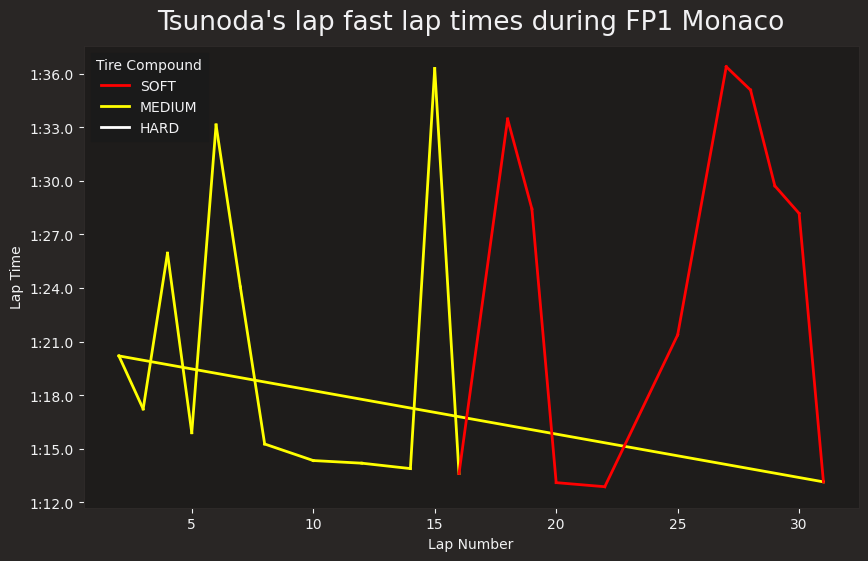

In [31]:
import matplotlib.lines as mlines


compound_colors = {
    'SOFT': 'red',    
    'MEDIUM': 'yellow',
    'HARD': 'white',

}


fig, ax = plt.subplots(figsize=(10,6))

fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False, color_scheme='fastf1')
for i in range(0, len(prac_1_laps)):
    lap_1 = prac_1_laps.iloc[i - 1]
    lap_2 = prac_1_laps.iloc[i]
    
    compound_1 = lap_1['Compound']
    compound_2 = lap_2['Compound']
    
    color_1 = compound_colors.get(compound_1)  
    color_2 = compound_colors.get(compound_2)  

    ax.plot([lap_1['LapNumber'], lap_2['LapNumber']], 
            [lap_1['LapTime'], lap_2['LapTime']], 
            color=color_2, lw=2)

handles = []
for compound, color in compound_colors.items():
    line = mlines.Line2D([0], [0], color=color, lw=2)
    handles.append(line)
    
ax.legend(handles=handles, labels=compound_colors.keys(), title='Tire Compound')

ax.set_xlabel('Lap Number')
ax.set_ylabel('Lap Time')
ax.set_title("Tsunoda's lap fast lap times during FP1 Monaco") 
plt.savefig('plots/tsunoda_laptimes.png')

In [15]:
prac_1_laps = all_laps.loc[all_laps['session'] == 'FP1']

prac_1_laps.loc[prac_1_laps['Deleted'] == False, ['FreshTyre', 'LapTime', 'LapNumber', 'Compound']]

,FreshTyre,LapTime,LapNumber,Compound
0,True,0 days 00:01:41.973000,1.0,MEDIUM
1,True,0 days 00:01:20.196000,2.0,MEDIUM
2,True,0 days 00:01:17.227000,3.0,MEDIUM
3,True,0 days 00:01:25.943000,4.0,MEDIUM
4,True,0 days 00:01:15.898000,5.0,MEDIUM
5,True,0 days 00:01:33.122000,6.0,MEDIUM
6,True,0 days 00:01:24.053000,7.0,MEDIUM
7,True,0 days 00:01:15.266000,8.0,MEDIUM
8,True,0 days 00:01:45.850000,9.0,MEDIUM
9,True,0 days 00:01:14.340000,10.0,MEDIUM


On the 6th lap, the tyre is then classified as old.

We can model grip like this:

Speed vs. Throttle: If the throttle is high, but speed is low, the car might be struggling for grip.

Speed vs. Brake: If the car is braking hard but not slowing down quickly (low speed), it could indicate the tires aren't generating enough grip for effective braking.

RPM and Throttle: If the car is applying a lot of throttle but the RPM is low, this might suggest that grip is insufficient, causing wheel spin or less power delivery to the ground.

In [16]:
# Telemetry data for Tsunoda

session = fastf1.get_session(2024, 'Monaco', 'FP1')
session.load()

driver_laps = session.laps.pick_driver('TSU')

all_telemetry = []

for lap_index, lap in driver_laps.iterlaps():
    telemetry = lap.get_telemetry()
    all_telemetry.append(telemetry)


telemetry_data = pd.concat(all_telemetry, ignore_index=True)
telemetry_data.head()

core           INFO 	Loading data for Monaco Grand Prix - Practice 1 [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '2', '3', '4', '10', '11', '14', '16', '18', '20', '22', '23', '24', '27', '31', '44', '55', '63', '77', '81']
c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_dri

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2024-05-24 11:30:52.936,0 days 00:13:00.703000,,160.851667,0 days 00:00:00,3707.310726,33.000000,1,0.000000,False,8,interpolation,-0.005815,-0.000002,OnTrack,-7580.878280,-6637.104436,-5.959981e-53
1,2024-05-24 11:30:53.077,0 days 00:13:00.844000,,160.851667,0 days 00:00:00.141000,3734.000000,33.000000,1,0.000000,False,8,car,1.292500,0.000391,OnTrack,-7585.035448,-6626.882026,-7.398185e-53
2,2024-05-24 11:30:53.241,0 days 00:13:01.008000,,160.851667,0 days 00:00:00.305000,3760.422222,33.455556,1,2.277778,False,8,pos,2.818347,0.000852,OnTrack,-7589.000000,-6616.000000,0.000000e+00
3,2024-05-24 11:30:53.437,0 days 00:13:01.204000,81,160.851667,0 days 00:00:00.501000,3792.000000,34.000000,1,5.000000,False,8,car,4.692500,0.001418,OnTrack,-7592.744782,-6604.091724,1.574934e-52
4,2024-05-24 11:30:53.521,0 days 00:13:01.288000,81,161.901667,0 days 00:00:00.585000,3930.075000,35.050000,1,5.000000,False,8,pos,5.523770,0.001669,OnTrack,-7595.000000,-6598.000000,0.000000e+00


In [17]:
telemetry_data.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
0,2024-05-24 11:30:52.936,0 days 00:13:00.703000,,160.851667,0 days 00:00:00,3707.310726,33.000000,1,0.000000,False,8,interpolation,-0.005815,-0.000002,OnTrack,-7580.878280,-6637.104436,-5.959981e-53
1,2024-05-24 11:30:53.077,0 days 00:13:00.844000,,160.851667,0 days 00:00:00.141000,3734.000000,33.000000,1,0.000000,False,8,car,1.292500,0.000391,OnTrack,-7585.035448,-6626.882026,-7.398185e-53
2,2024-05-24 11:30:53.241,0 days 00:13:01.008000,,160.851667,0 days 00:00:00.305000,3760.422222,33.455556,1,2.277778,False,8,pos,2.818347,0.000852,OnTrack,-7589.000000,-6616.000000,0.000000e+00
3,2024-05-24 11:30:53.437,0 days 00:13:01.204000,81,160.851667,0 days 00:00:00.501000,3792.000000,34.000000,1,5.000000,False,8,car,4.692500,0.001418,OnTrack,-7592.744782,-6604.091724,1.574934e-52
4,2024-05-24 11:30:53.521,0 days 00:13:01.288000,81,161.901667,0 days 00:00:00.585000,3930.075000,35.050000,1,5.000000,False,8,pos,5.523770,0.001669,OnTrack,-7595.000000,-6598.000000,0.000000e+00


Let's get the data we need (Speed, throttle, brake)

In [18]:
telemetry_data.info()

<class 'fastf1.core.Telemetry'>
RangeIndex: 28480 entries, 0 to 28479
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Date                   28480 non-null  datetime64[ns] 
 1   SessionTime            28480 non-null  timedelta64[ns]
 2   DriverAhead            28480 non-null  object         
 3   DistanceToDriverAhead  28480 non-null  float64        
 4   Time                   28480 non-null  timedelta64[ns]
 5   RPM                    28480 non-null  float64        
 6   Speed                  28480 non-null  float64        
 7   nGear                  28480 non-null  int64          
 8   Throttle               28480 non-null  float64        
 9   Brake                  28480 non-null  bool           
 10  DRS                    28480 non-null  int64          
 11  Source                 28480 non-null  object         
 12  Distance               28480 non-null  float64      

In [19]:
telemetry_data = telemetry_data.drop(columns=['Date', 'SessionTime', 'DriverAhead','DistanceToDriverAhead', 'nGear', 'DRS', 'Source', 'Distance', 'RelativeDistance', 'X', 'Y', 'Z'])
telemetry_data.head()


,Time,RPM,Speed,Throttle,Brake,Status
0,0 days 00:00:00,3707.310726,33.000000,0.000000,False,OnTrack
1,0 days 00:00:00.141000,3734.000000,33.000000,0.000000,False,OnTrack
2,0 days 00:00:00.305000,3760.422222,33.455556,2.277778,False,OnTrack
3,0 days 00:00:00.501000,3792.000000,34.000000,5.000000,False,OnTrack
4,0 days 00:00:00.585000,3930.075000,35.050000,5.000000,False,OnTrack


In [20]:
telemetry_data.to_csv('training_data_for_tire_deg/telemetry_data.csv', index=False)

In [21]:
driver_laps = session.laps.pick_driver('TSU')
driver_laps.info()

<class 'fastf1.core.Laps'>
Index: 34 entries, 291 to 324
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                34 non-null     timedelta64[ns]
 1   Driver              34 non-null     object         
 2   DriverNumber        34 non-null     object         
 3   LapTime             31 non-null     timedelta64[ns]
 4   LapNumber           34 non-null     float64        
 5   Stint               34 non-null     float64        
 6   PitOutTime          3 non-null      timedelta64[ns]
 7   PitInTime           3 non-null      timedelta64[ns]
 8   Sector1Time         33 non-null     timedelta64[ns]
 9   Sector2Time         33 non-null     timedelta64[ns]
 10  Sector3Time         31 non-null     timedelta64[ns]
 11  Sector1SessionTime  33 non-null     timedelta64[ns]
 12  Sector2SessionTime  33 non-null     timedelta64[ns]
 13  Sector3SessionTime  31 non-null     timedelta64[ns

c:\Users\chchr\Python Projects\F1 Project\.venv\Lib\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"


In [22]:
driver_laps.info()

<class 'fastf1.core.Laps'>
Index: 34 entries, 291 to 324
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype          
---  ------              --------------  -----          
 0   Time                34 non-null     timedelta64[ns]
 1   Driver              34 non-null     object         
 2   DriverNumber        34 non-null     object         
 3   LapTime             31 non-null     timedelta64[ns]
 4   LapNumber           34 non-null     float64        
 5   Stint               34 non-null     float64        
 6   PitOutTime          3 non-null      timedelta64[ns]
 7   PitInTime           3 non-null      timedelta64[ns]
 8   Sector1Time         33 non-null     timedelta64[ns]
 9   Sector2Time         33 non-null     timedelta64[ns]
 10  Sector3Time         31 non-null     timedelta64[ns]
 11  Sector1SessionTime  33 non-null     timedelta64[ns]
 12  Sector2SessionTime  33 non-null     timedelta64[ns]
 13  Sector3SessionTime  31 non-null     timedelta64[ns

In [23]:
tsunoda_laps = driver_laps[['Time', 'LapTime', 'LapNumber', 'Stint', 'PitOutTime', 'PitInTime', 'Compound', 'TyreLife', 'FreshTyre', 'LapStartTime', 'LapStartDate']]

In [24]:
tsunoda_laps.to_csv('training_data_for_tire_deg/laptimes_data.csv', index=False)